In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

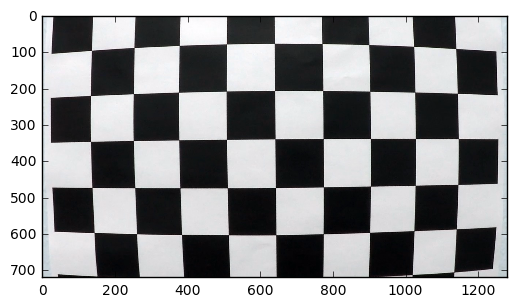

In [2]:
# Make a list of calibration images
fname = 'camera_cal/calibration1.jpg'
img = cv2.imread(fname)
plt.imshow(img)
plt.show()

In [3]:
# Make a list of calibration images
fname = 'camera_cal/calibration1.jpg'
img = cv2.imread(fname)

# prepare object points
nx = 9
ny = 6

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.show()

In [5]:
objpoints = []
imgpoints = []

objp       = np.zeros((nx * ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

images = glob.glob('camera_cal/calibration*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        print(fname)
        imgpoints.append(corners)
        objpoints.append(objp)
        img2 = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        write_name = 'camera_cal/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img2)

camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
camera_cal\calibration20.jpg
camera_cal\calibration3.jpg
camera_cal\calibration6.jpg
camera_cal\calibration7.jpg
camera_cal\calibration8.jpg
camera_cal\calibration9.jpg


In [6]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

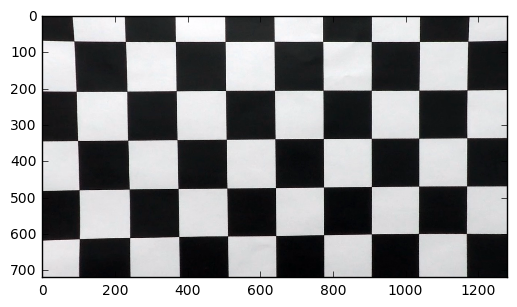

In [8]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)
plt.show()

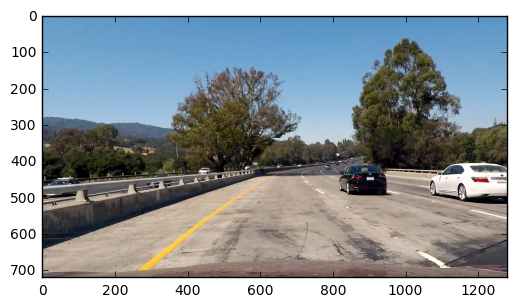

In [12]:
img = cv2.imread('test_images/test1.jpg')
img_size = (img.shape[1], img.shape[0])
undist  = cv2.undistort(img, mtx, dist, None, mtx)
undist  = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
plt.imshow(undist)
plt.show()

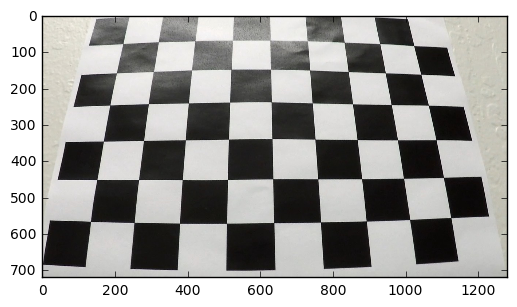

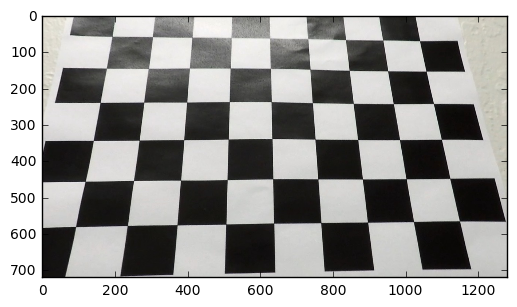

In [14]:
img = cv2.imread('camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])
undist   = cv2.undistort(img, mtx, dist, None, mtx)
img      = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
undist   = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(undist)
plt.show()

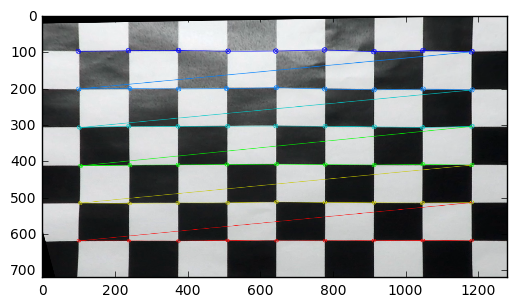

In [15]:
# Make a list of calibration images
fname  = 'camera_cal/calibration3.jpg'
img    = cv2.imread(fname)
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray   = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
    offset = 100
    img_size = (gray.shape[1], gray.shape[0])
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist, M, img_size)
    plt.imshow(warped)
    plt.show()

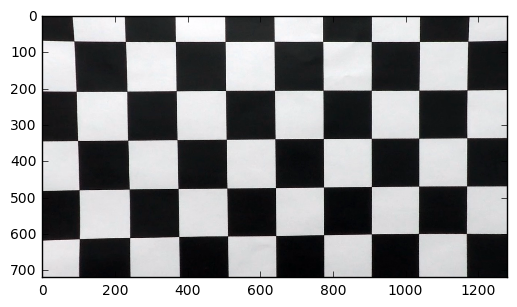

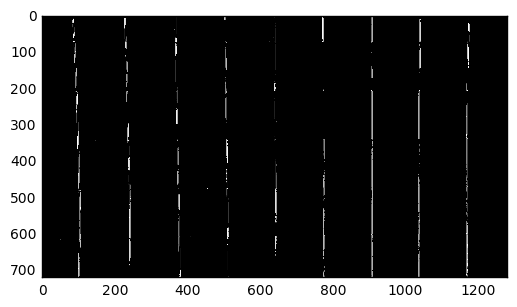

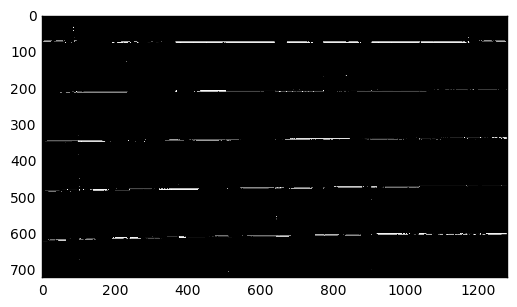

In [16]:
fname  = 'camera_cal/calibration1.jpg'
img    = cv2.imread(fname)
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray   = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
plt.imshow(undist)
plt.show()

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)
scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobelx)
sxbinary[(scaled_sobelx >= thresh_min) & (scaled_sobelx <= thresh_max)] = 1
sybinary = np.zeros_like(scaled_sobely)
sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1

plt.imshow(sxbinary, cmap='gray')
plt.show()
plt.imshow(sybinary, cmap='gray')
plt.show()

In [57]:
def colorSpaceR(image):
    return image[:,:,2]
    
def colorSpaceS(image):
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    S   = hls[:,:,2]
    return S

def colorSpaceY(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    Y   = yuv[:,:,0]
    return Y

def colorSpaceG(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [58]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255), color='r'):
    if color == 'r':
        gray = colorSpaceR(img)
    if color == 's':
        gray = colorSpaceS(img)
    if color == 'y':
        gray = colorSpaceY(img)
    if color == 'g':
        gray = colorSpaceG(img)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

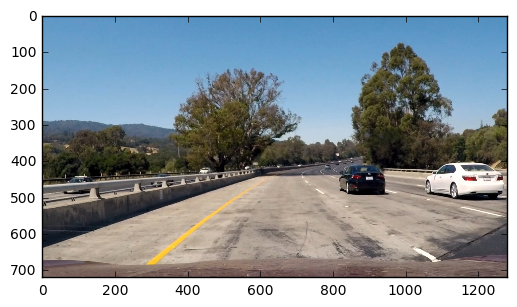

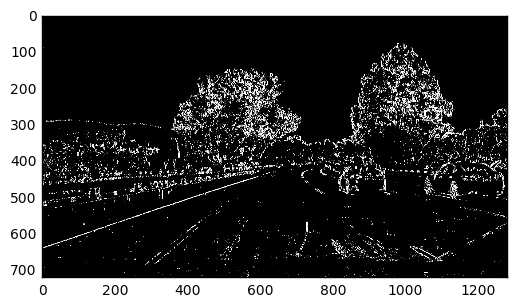

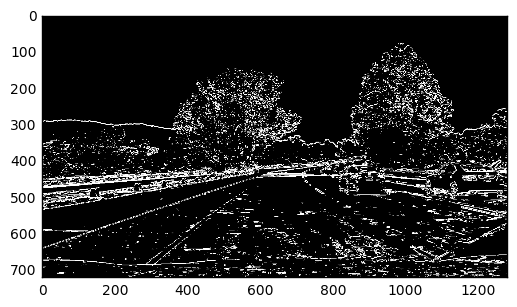

In [59]:
image = cv2.imread('test_images/test1.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
grad_binaryx = abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(20, 100))
grad_binaryy = abs_sobel_thresh(image, orient='y', sobel_kernel=3, thresh=(20, 100))
plt.imshow(grad_binaryx, cmap='gray')
plt.show()
plt.imshow(grad_binaryy, cmap='gray')
plt.show()

In [60]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255), color='r'):
    if color == 'r':
        gray = colorSpaceR(img)
    if color == 's':
        gray = colorSpaceS(img)
    if color == 'y':
        gray = colorSpaceY(img)
    if color == 'g':
        gray = colorSpaceG(img)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return binary_output

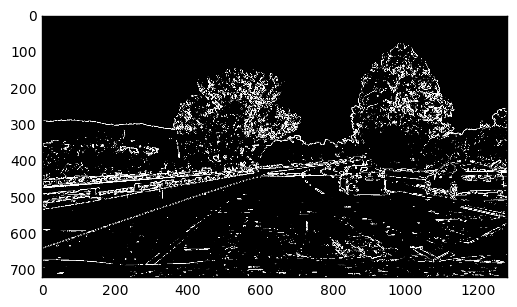

In [61]:
image = cv2.imread('test_images/test1.jpg')
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
plt.imshow(mag_binary, cmap='gray')
plt.show()

In [62]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2), color='r'):
    if color == 'r':
        gray = colorSpaceR(img)
    if color == 's':
        gray = colorSpaceS(img)
    if color == 'y':
        gray = colorSpaceY(img)
    if color == 'g':
        gray = colorSpaceG(img)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return binary_output

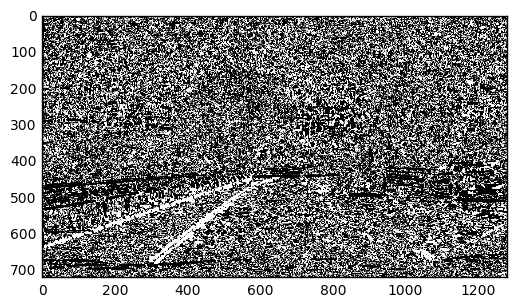

In [63]:
image = cv2.imread('test_images/test1.jpg')
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
plt.imshow(dir_binary, cmap='gray')
plt.show()

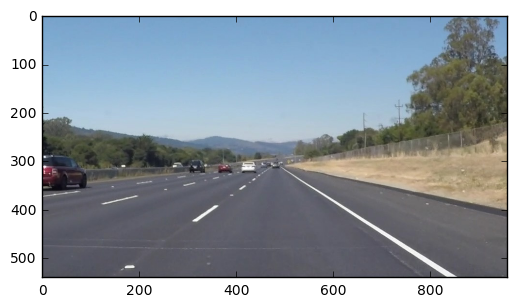

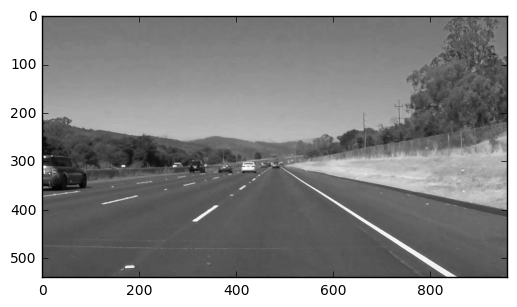

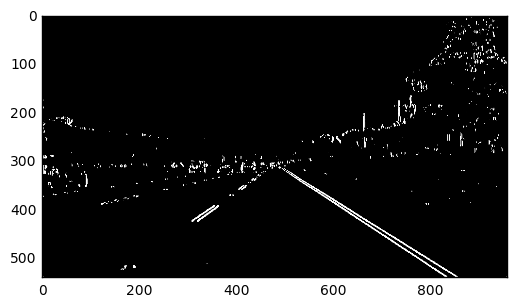

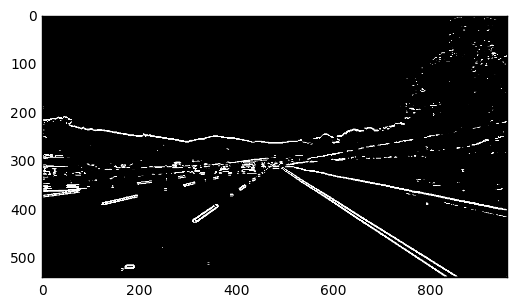

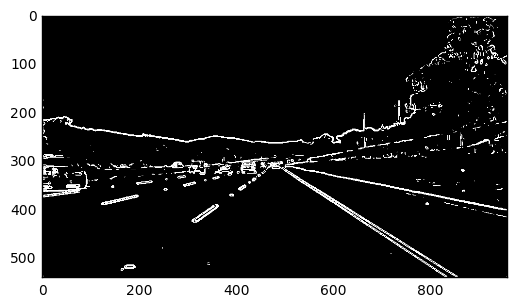

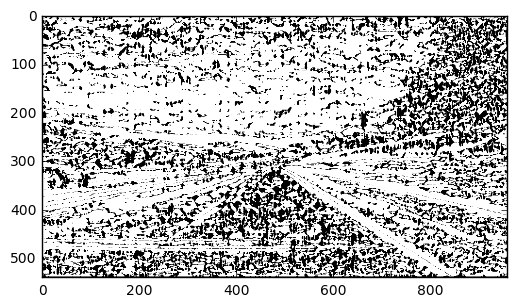

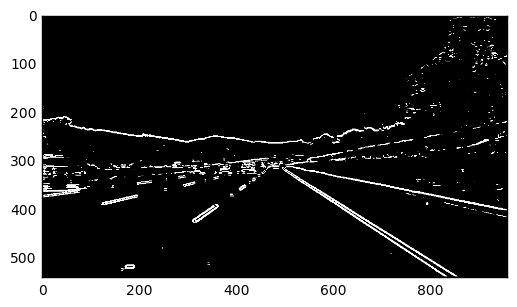

In [64]:
image = cv2.imread('test_images/solidWhiteRight.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(colorSpaceR(image), cmap='gray')
plt.show()

ksize = 5
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(40, 200))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(40, 200))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(40, 200))
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35))

plt.imshow(gradx, cmap='gray')
plt.show()
plt.imshow(grady, cmap='gray')
plt.show()
plt.imshow(mag_binary, cmap='gray')
plt.show()
plt.imshow(dir_binary, cmap='gray')
plt.show()

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

plt.imshow(combined, cmap='gray')
plt.show()

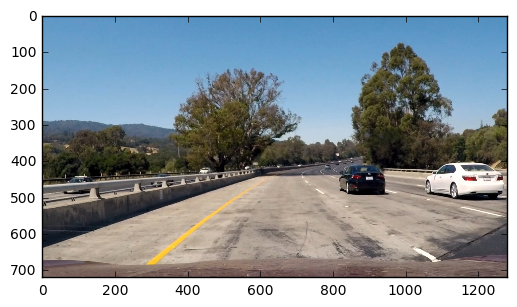

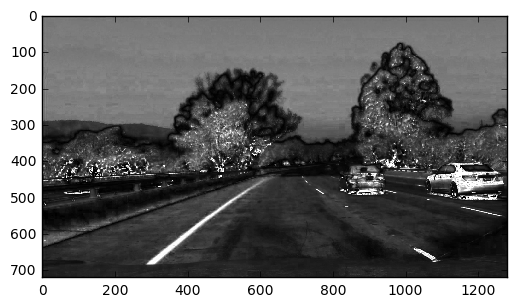

In [65]:
image = cv2.imread('test_images/test1.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

plt.imshow(S, cmap='gray')
plt.show()

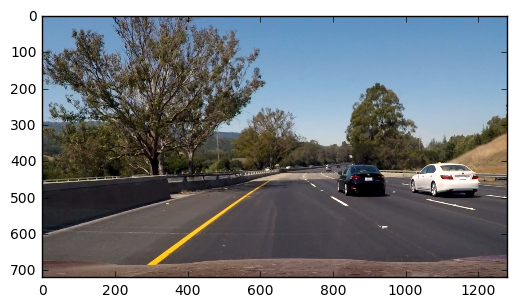

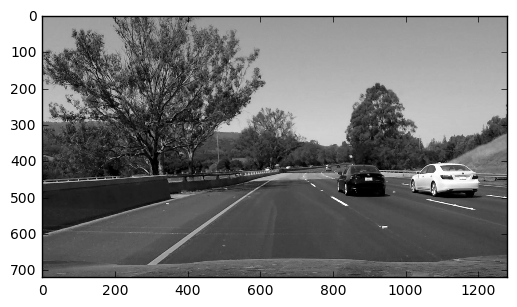

In [66]:
image = cv2.imread('test_images/test6.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
Y = yuv[:,:,0]
U = yuv[:,:,1]
V = yuv[:,:,2]

plt.imshow(Y, cmap='gray')
plt.show()

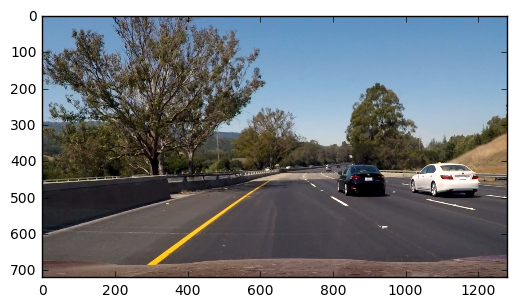

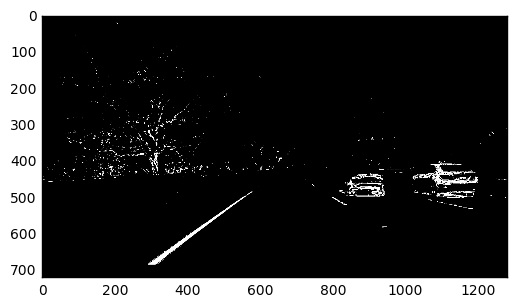

In [67]:
image = cv2.imread('test_images/test6.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    binary_output =  np.zeros_like(S)
    binary_output[(S >= thresh[0]) & (S <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(200, 255))
plt.imshow(hls_binary, cmap='gray')
plt.show()

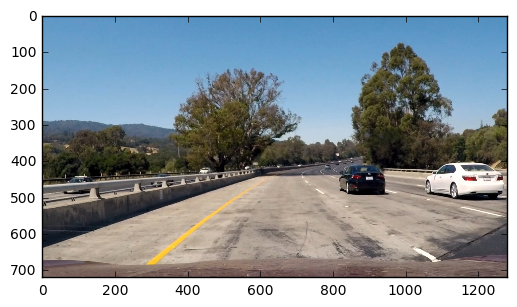

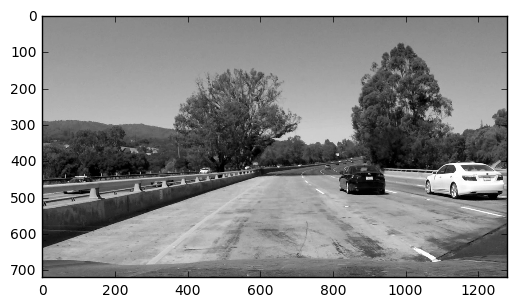

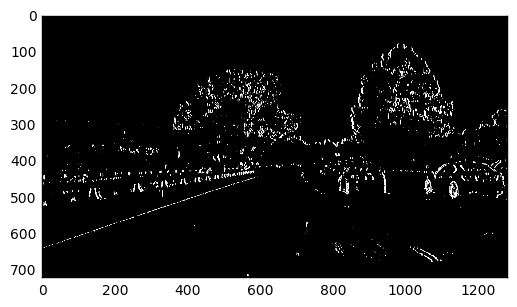

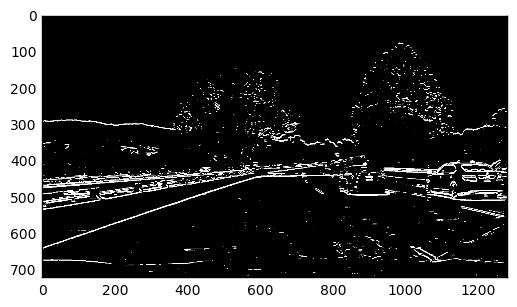

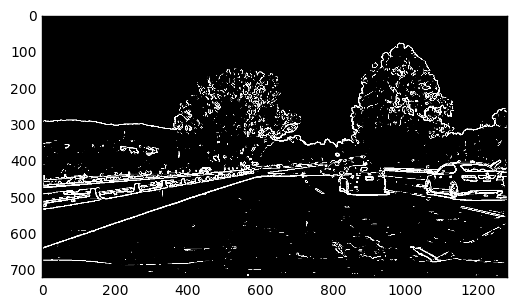

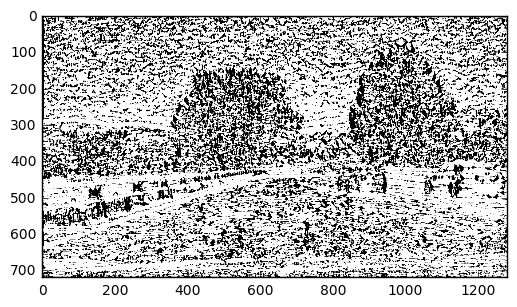

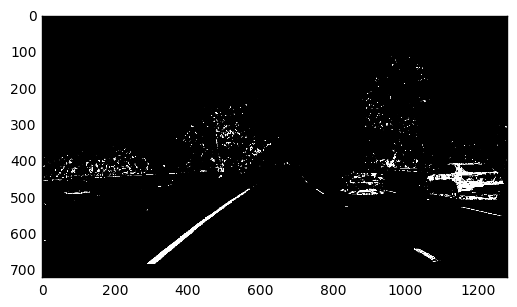

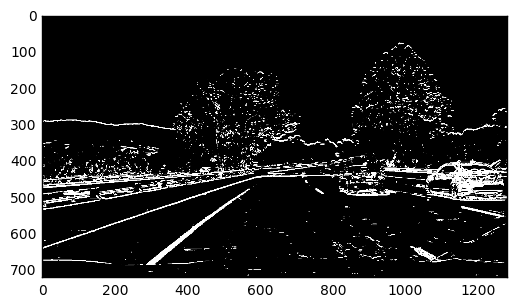

In [69]:
image = cv2.imread('test_images/test1.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(colorSpaceG(image), cmap='gray')
plt.show()

ksize = 7
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(40, 200), color = 'g')
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(40, 200), color = 'g')
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(40, 200), color = 'g')
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35), color = 'g')
hls_binary = hls_select(image, thresh=(170, 255))

plt.imshow(gradx, cmap='gray')
plt.show()
plt.imshow(grady, cmap='gray')
plt.show()
plt.imshow(mag_binary, cmap='gray')
plt.show()
plt.imshow(dir_binary, cmap='gray')
plt.show()
plt.imshow(hls_binary, cmap='gray')
plt.show()

combined = np.zeros_like(dir_binary)
combined[(hls_binary == 1) | ((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

plt.imshow(combined, cmap='gray')
plt.show()


In [74]:
def pipeline(img, s_thresh=(170, 255), sx_thresh=(40, 100)):
    
    ksize = 7
    
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=sx_thresh, color=colorspace)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=sx_thresh, color=colorspace)
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=sx_thresh, color=colorspace)
    
    dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35), color=colorspace)
    
    hls_binary = hls_select(image, thresh=s_thresh)
    
    combined = np.zeros_like(dir_binary)
    combined[(hls_binary == 1) | ((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    return combined

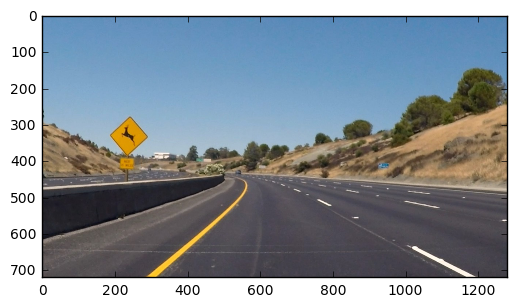

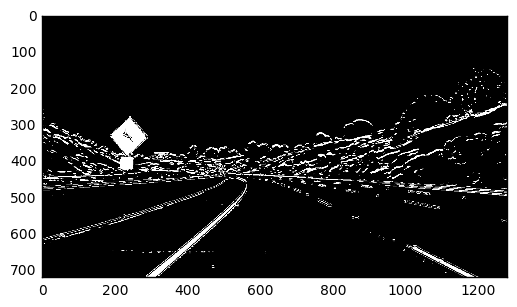

In [76]:
image = cv2.imread('test_images/test2.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(pipeline(image), cmap='gray')
plt.show()